In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.datasets import cifar10

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Print the shape of the CIFAR-10 dataset
print("CIFAR-10 Dataset:")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


CIFAR-10 Dataset:
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Displays the first image of each class in the CIFAR-10 dataset along with its corresponding class label.

CIFAR-10 Dataset:


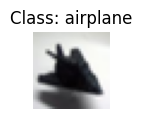

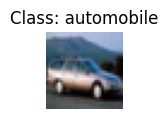

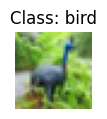

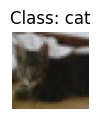

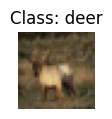

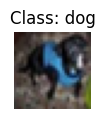

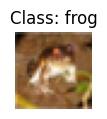

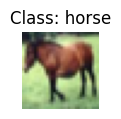

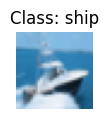

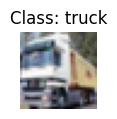

In [5]:
import matplotlib.pyplot as plt

# Define class labels for CIFAR-10
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Print the CIFAR-10 dataset
print("CIFAR-10 Dataset:")
for i in range(10):
    # Find the index of the first occurrence of class i in y_train
    idx = np.where(y_train == i)[0][0]
    # Display the first image of class i
    plt.figure(figsize=(1, 1))
    plt.imshow(x_train[idx].reshape(32, 32, 3), cmap='gray')
    plt.title(f"Class: {class_labels[i]}")
    plt.axis('off')
    plt.show()


In [6]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32')
x_train /= 255
x_test /= 255

In [7]:
# Print the original data
print("Original Data:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("Sample x_train data before preprocessing:")
print(x_train[0])

# Preprocess the data
x_train_processed = x_train.reshape(x_train.shape[0], -1).astype('float32')
x_test_processed = x_test.reshape(x_test.shape[0], -1).astype('float32')
x_train_processed /= 255
x_test_processed /= 255

# Print the preprocessed data
print("\nPreprocessed Data:")
print("x_train shape after preprocessing:", x_train_processed.shape)
print("x_test shape after preprocessing:", x_test_processed.shape)
print("Sample x_train data after preprocessing:")
print(x_train_processed[0])


Original Data:
x_train shape: (50000, 3072)
x_test shape: (10000, 3072)
Sample x_train data before preprocessing:
[0.23137255 0.24313726 0.24705882 ... 0.48235294 0.36078432 0.28235295]

Preprocessed Data:
x_train shape after preprocessing: (50000, 3072)
x_test shape after preprocessing: (10000, 3072)
Sample x_train data after preprocessing:
[0.00090734 0.00095348 0.00096886 ... 0.00189158 0.00141484 0.00110727]


In [8]:
# Apply LDA for feature extraction
# Reduce the number of components in LDA
n_components = min(x_train.shape[1], len(np.unique(y_train)) - 1)  # Maximum n_classes - 1 components
lda = LDA(n_components=n_components)
x_train_lda = lda.fit_transform(x_train, y_train.ravel())
x_test_lda = lda.transform(x_test)


In [9]:
# Split the dataset into training and testing sets
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train_lda, y_train, test_size=0.2, random_state=42)


In [12]:
# Train different classifiers
classifiers = {
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(x_train_final, y_train_final.ravel())
    y_pred = clf.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy

    # Print confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("--------------------------------")



Classifier: kNN
Accuracy: 0.4419
Confusion Matrix:
[[545  56  41  53  26  25  13  39 119  56]
 [ 89 517  31  40  31  39  32  34  65 101]
 [115  44 405  84 130  71  75  64  26  16]
 [ 71  59 129 365  79 121 108  42  27  22]
 [ 77  34 170  62 368  46  69  66  27  14]
 [ 65  40 142 179 104 320  71  48  30  16]
 [ 34  47 124 102 113  76 435  33  15  17]
 [ 67  41  93  86 127  62  31 435  20  32]
 [180  67  27  53  25  34  14  19 550  48]
 [101 154  28  46  23  32  31  66  80 479]]
--------------------------------
Classifier: SVM
Accuracy: 0.5187
Confusion Matrix:
[[553  47  32  47  25  35  18  49 114  53]
 [ 38 573  19  37  27  28  29  33  69 126]
 [ 75  30 439  81 108  70  86  76  42  23]
 [ 37  35  88 421  61 154 122  36  37  32]
 [ 50  21 118  60 430  41  91  70  31  21]
 [ 26  36  94 163  84 417  89  54  34  18]
 [ 10  27  67 113  90  57 570  22  11  29]
 [ 38  26  57  69  80  65  36 536  20  67]
 [113  65  23  43   9  37  11  16 633  67]
 [ 51 124  21  40  19  26  33  41  70 615]]
---

In [13]:

# Identify the best classifier
best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("Classifier\t\tAccuracy")
print("--------------------------------")
for name, accuracy in results.items():
    print(f"{name}\t\t{accuracy:.4f}")

print("--------------------------------")
print(f"Best Classifier: {best_classifier} (Accuracy: {best_accuracy:.4f})")


Classifier		Accuracy
--------------------------------
kNN		0.4419
SVM		0.5187
Random Forest		0.5044
--------------------------------
Best Classifier: SVM (Accuracy: 0.5187)
